In [9]:
import numpy as np
import joblib
best_rf_model = joblib.load('../results/best_rf_model.pkl')
x_train = np.loadtxt('../data/x_train.csv', delimiter=',')
x_test = np.loadtxt('../data/x_test.csv', delimiter=',')
y_train = np.loadtxt('../data/y_train.csv', delimiter=',')
y_test = np.loadtxt('../data/y_test.csv', delimiter=',')
#loads in model and data

/tmp/ipykernel_1018887/3731554500.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mae_by_category = df.groupby('Weight Category')['Residual'].apply(lambda x: np.mean(np.abs(x)))


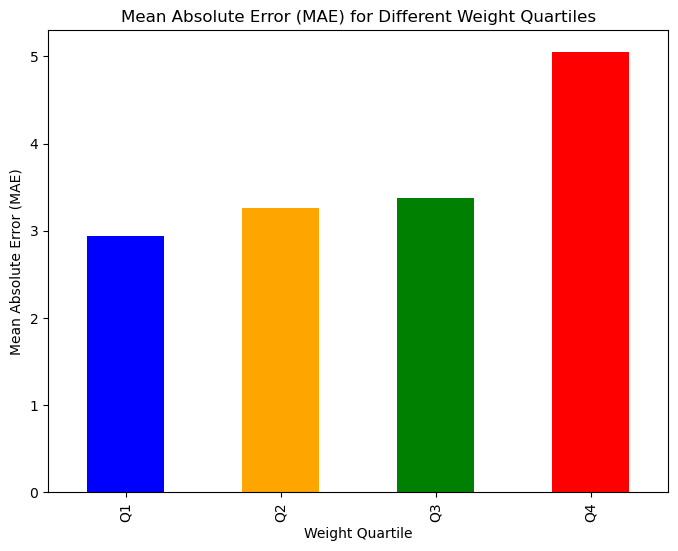

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
y_pred = best_rf_model.predict(x_test)
residuals = y_pred - y_test

weights = x_test[:, 1]
df = pd.DataFrame({
    'Weight': weights,
    'Residual': residuals
})


df['Weight Category'] = pd.qcut(df['Weight'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
mae_by_category = df.groupby('Weight Category')['Residual'].apply(lambda x: np.mean(np.abs(x)))


plt.figure(figsize=(8, 6))
mae_by_category.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title('Mean Absolute Error (MAE) for Different Weight Quartiles')
plt.xlabel('Weight Quartile')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks()
plt.savefig('../results/weight_errors.png')
#saves plot to results
plt.show()
#plots error in different quartiles of weight to show if there is a relationship between error and weight

In [6]:
import numpy as np

y_pred_train = best_rf_model.predict(x_train)

differences = np.abs(y_pred_train - y_train)

max_diff_index = np.argmax(differences)

max_diff_point = x_train[max_diff_index]

actual_value = y_train[max_diff_index] 
predicted_value = y_pred_train[max_diff_index]

print(f"Index with largest difference: {max_diff_index}")
print(f"Actual body fat: {actual_value}")
print(f"Predicted body fat: {predicted_value}")
print(f"Data point (features) with largest difference: {max_diff_point}")
#testing to see what points have the largest error

Index with largest difference: 182
Actual body fat: 38.1
Predicted body fat: 32.14928214285714
Data point (features) with largest difference: [0.47834849 2.48595778 1.98693305 1.70081909 1.92038203 2.10185444
 1.99490086 2.00785806 2.75505854 1.76497137 1.82102194 1.48988794
 1.739214   1.         0.        ]


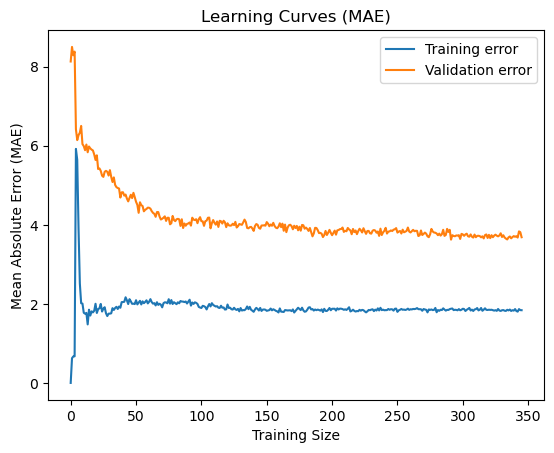

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

def plot_learning_curve(model, X_train, y_train, X_test, y_test):
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_absolute_error(y_train[:m], y_train_predict))
        val_errors.append(mean_absolute_error(y_test, y_test_predict))

    plt.plot(train_errors, label='Training error')
    plt.plot(val_errors, label='Validation error')
    plt.title('Learning Curves (MAE)')
    plt.xlabel('Training Size')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.legend()
    plt.savefig('../results/learning_curve.png')
    #saves plot to results
    plt.show()

plot_learning_curve(best_rf_model, x_train, y_train, x_test, y_test)

#plotting learning curves